# **Team Details :**

*Team Number - 35*


# **Team Member :**

*1- Himanshu Singhal (24120030)*

*2- Gaurav Kumar (24120027)*

In [ ]:
!curl -o citibike-tripdata.zip https://s3.amazonaws.com/tripdata/202412-citibike-tripdata.zip

!unzip citibike-tripdata.zip -d citibike_data/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  430M  100  430M    0     0  30.7M      0  0:00:13  0:00:13 --:--:-- 32.9M
Archive:  citibike-tripdata.zip
 extracting: citibike_data/202412-citibike-tripdata_1.csv  
 extracting: citibike_data/202412-citibike-tripdata_3.csv  
 extracting: citibike_data/202412-citibike-tripdata_2.csv  


In [ ]:

!pip install pandera

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 11.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df = pd.read_csv("citibike_data/202412-citibike-tripdata_1.csv")

<ipython-input-26-b469f20ed2d5>:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("citibike_data/202412-citibike-tripdata_1.csv")


In [ ]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,B44E5B10AEE58AD0,classic_bike,2024-12-14 10:58:18.153,2024-12-14 11:11:11.308,Frederick Douglass Blvd & W 145 St,7954.12,E 138 St & 5 Ave,7809.13,40.823061,-73.941928,40.814490,-73.936153,member
1,BC252DC6A6011556,electric_bike,2024-12-12 14:46:12.473,2024-12-12 16:45:37.777,Madison Ave & E 99 St,7443.01,NaN,NaN,40.789485,-73.952429,40.780000,-73.960000,member
2,6FBE55EF6FE8736D,electric_bike,2024-12-11 07:55:18.770,2024-12-11 08:02:23.460,Columbia St & Kane St,4422.05,NaN,NaN,40.687632,-74.001626,40.690000,-74.000000,member
3,908890DE7FDCF9FE,electric_bike,2024-12-09 22:51:11.668,2024-12-09 22:57:43.495,E 13 St & 2 Ave,5820.08,E 10 St & 2 Ave,5746.02,40.731539,-73.985302,40.729708,-73.986598,member
4,D5D366379A4DC0A8,classic_bike,2024-12-10 18:48:40.063,2024-12-10 19:10:32.264,11 Ave & W 41 St,6726.01,E 25 St & 1 Ave,6004.07,40.760301,-73.998842,40.738177,-73.977387,member


In [ ]:
# check for the columns having the null values
null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]
print("Columns with null values and their counts:\n", null_columns)

Columns with null values and their counts:
 start_station_name     625
start_station_id       625
end_station_name      3583
end_station_id        4475
end_lat                205
end_lng                205
dtype: int64


In [ ]:
df.dtypes

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
ride_id,object
rideable_type,object
started_at,object
ended_at,object
start_station_name,object
start_station_id,object
end_station_name,object
end_station_id,object
start_lat,float64
start_lng,float64


In [ ]:
import pandas as pd
import pandera as pa
from pandera import Column, DataFrameSchema, Check

# Coerce categorical columns to the appropriate type
df["rideable_type"] = df["rideable_type"].astype("category")
df["member_casual"] = df["member_casual"].astype("category")
df["start_station_id"] = df["start_station_id"].astype(str)
df["end_station_id"] = df["end_station_id"].astype(str)
# Define a simplified Pandera schema for datatype validation
schema = DataFrameSchema({
    "ride_id": Column(pa.String, nullable=False),
    "rideable_type": Column(pa.Category, nullable=False),
    "started_at": Column(pa.String, nullable=False),
    "ended_at": Column(pa.String, nullable=False),
    "start_station_name": Column(pa.String, nullable=True),
    "start_station_id": Column(pa.String, nullable=True),
    "end_station_name": Column(pa.String, nullable=True),
    "end_station_id": Column(pa.String, nullable=True),
    "start_lat": Column(pa.Float, nullable=False),
    "start_lng": Column(pa.Float, nullable=False),
    "end_lat": Column(pa.Float, nullable=True),
    "end_lng": Column(pa.Float, nullable=True),
    "member_casual": Column(pa.Category, nullable=False),
})

# Validate the dataset
try:
    validated_data = schema.validate(df)
    print(validated_data)
    print("Validation successful.")
except pa.errors.SchemaErrors as e:
    print(f"Validation failed with errors:\n{e}")


                 ride_id  rideable_type               started_at  \
0       B44E5B10AEE58AD0   classic_bike  2024-12-14 10:58:18.153   
1       BC252DC6A6011556  electric_bike  2024-12-12 14:46:12.473   
2       6FBE55EF6FE8736D  electric_bike  2024-12-11 07:55:18.770   
3       908890DE7FDCF9FE  electric_bike  2024-12-09 22:51:11.668   
4       D5D366379A4DC0A8   classic_bike  2024-12-10 18:48:40.063   
...                  ...            ...                      ...   
999995  4D7A0F3A9B538327   classic_bike  2024-12-06 18:43:51.866   
999996  93C022D486F87ABC   classic_bike  2024-12-10 10:34:58.071   
999997  20A11C486859F19B  electric_bike  2024-12-03 14:02:29.375   
999998  4D27B49621858BF9  electric_bike  2024-12-05 07:03:08.210   
999999  AA99DCFF9F464CC0  electric_bike  2024-12-09 08:33:59.397   

                       ended_at                  start_station_name  \
0       2024-12-14 11:11:11.308  Frederick Douglass Blvd & W 145 St   
1       2024-12-12 16:45:37.777          

In [ ]:
# Define the Pandera schema
schema = DataFrameSchema({
    # Check that ride_id is non-null and unique
    "ride_id": Column(pa.String, nullable=False, checks=Check(lambda s: s.is_unique, element_wise=False)),

    # Ensure rideable_type has valid options
    "rideable_type": Column(
        pa.Category,
        nullable=False,
        checks=Check.isin(df["rideable_type"].unique())
    ),

    # Check that started_at and ended_at are valid datetime strings
    "started_at": Column(
        pa.String,
        nullable=False,
        checks=Check.str_matches(r"^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}(\.\d+)?$")
    ),
    "ended_at": Column(
        pa.String,
        nullable=False,
        checks=Check.str_matches(r"^\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}(\.\d+)?$")
    ),

    # Check that start and end station names are strings (nullable is allowed)
    "start_station_name": Column(pa.String, nullable=True),
    "end_station_name": Column(pa.String, nullable=True),

    # Check that start and end station IDs are strings
    "start_station_id": Column(
        pa.String,
        nullable=True,
        checks=Check.str_length(1, None)  # Ensures non-empty if present
    ),
    "end_station_id": Column(
        pa.String,
        nullable=True,
        checks=Check.str_length(1, None)
    ),

    # Validate latitudes and longitudes are within valid ranges
    "start_lat": Column(
        pa.Float,
        nullable=False,
        checks=Check.in_range(-90, 90)
    ),
    "start_lng": Column(
        pa.Float,
        nullable=False,
        checks=Check.in_range(-180, 180)
    ),
    "end_lat": Column(
        pa.Float,
        nullable=True,
        checks=Check.in_range(-90, 90)
    ),
    "end_lng": Column(
        pa.Float,
        nullable=True,
        checks=Check.in_range(-180, 180)
    ),

    # Ensure member_casual has valid options
    "member_casual": Column(
        pa.Category,
        nullable=False,
        checks=Check.isin(df["member_casual"].unique())
    ),
})

# Validate the dataset
try:
    validated_data = schema.validate(df)
    print(validated_data)
    print("Validation successful.")
except pa.errors.SchemaErrors as e:
    print(f"Validation failed with errors:\n{e}")


                 ride_id  rideable_type               started_at  \
0       B44E5B10AEE58AD0   classic_bike  2024-12-14 10:58:18.153   
1       BC252DC6A6011556  electric_bike  2024-12-12 14:46:12.473   
2       6FBE55EF6FE8736D  electric_bike  2024-12-11 07:55:18.770   
3       908890DE7FDCF9FE  electric_bike  2024-12-09 22:51:11.668   
4       D5D366379A4DC0A8   classic_bike  2024-12-10 18:48:40.063   
...                  ...            ...                      ...   
999995  4D7A0F3A9B538327   classic_bike  2024-12-06 18:43:51.866   
999996  93C022D486F87ABC   classic_bike  2024-12-10 10:34:58.071   
999997  20A11C486859F19B  electric_bike  2024-12-03 14:02:29.375   
999998  4D27B49621858BF9  electric_bike  2024-12-05 07:03:08.210   
999999  AA99DCFF9F464CC0  electric_bike  2024-12-09 08:33:59.397   

                       ended_at                  start_station_name  \
0       2024-12-14 11:11:11.308  Frederick Douglass Blvd & W 145 St   
1       2024-12-12 16:45:37.777          

In [ ]:
from pandera.typing import DataFrame
df = pd.DataFrame(df)
# Define a custom check to ensure 'ended_at' is after 'started_at'
@pa.check_types
def validate_ride_times(df: DataFrame) -> DataFrame:
    assert (pd.to_datetime(df["ended_at"]) > pd.to_datetime(df["started_at"])).all(), "End time must be after start time"
    return df

# Validate the dataset
try:
    validated_data = schema.validate(df)
    print("Validation successful.")
except pa.errors.SchemaErrors as e:
    print(f"Validation failed with errors:\n{e}")


Validation successful.


In [ ]:
print(df)

                 ride_id  rideable_type               started_at  \
0       B44E5B10AEE58AD0   classic_bike  2024-12-14 10:58:18.153   
1       BC252DC6A6011556  electric_bike  2024-12-12 14:46:12.473   
2       6FBE55EF6FE8736D  electric_bike  2024-12-11 07:55:18.770   
3       908890DE7FDCF9FE  electric_bike  2024-12-09 22:51:11.668   
4       D5D366379A4DC0A8   classic_bike  2024-12-10 18:48:40.063   
...                  ...            ...                      ...   
999995  4D7A0F3A9B538327   classic_bike  2024-12-06 18:43:51.866   
999996  93C022D486F87ABC   classic_bike  2024-12-10 10:34:58.071   
999997  20A11C486859F19B  electric_bike  2024-12-03 14:02:29.375   
999998  4D27B49621858BF9  electric_bike  2024-12-05 07:03:08.210   
999999  AA99DCFF9F464CC0  electric_bike  2024-12-09 08:33:59.397   

                       ended_at                  start_station_name  \
0       2024-12-14 11:11:11.308  Frederick Douglass Blvd & W 145 St   
1       2024-12-12 16:45:37.777          

# ***Greate Expectations***

In [ ]:
!pip install great_expectations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.6/813.6 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 36.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: altair
    Found existing installation: altair 5.5.0
    Uninstalling altair-5.5.0:
      Successfully uninstalled altair-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of th

In [ ]:
import great_expectations as gx
from great_expectations.expectations.core.expect_column_values_to_be_of_type import ExpectColumnValuesToBeOfType
from great_expectations.checkpoint import (
    EmailAction
)

In [ ]:
context = gx.get_context(mode="file")


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Name for the data source
data_source_name = "my_data_source"
# Create a Pandas data source in Great Expectations
data_source = context.data_sources.add_pandas(name=data_source_name)
# Name for the data asset (DataFrame)
data_asset_name = "my_dataframe_data_asset"
# Add the DataFrame as a data asset
data_asset = data_source.add_dataframe_asset(name=data_asset_name)

In [ ]:
batch_definition = data_asset.add_batch_definition_whole_dataframe("batch definition")
# Creates a batch definition for the entire DataFrame.
batch_parameters = {"dataframe": df}
# Specifies the DataFrame to use in the batch.
batch = batch_definition.get_batch(batch_parameters)
# Creates a batch of data for validation.
print(batch.head(3))
# Prints the first 3 rows of the batch.

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

            ride_id  rideable_type               started_at  \
0  B44E5B10AEE58AD0   classic_bike  2024-12-14 10:58:18.153   
1  BC252DC6A6011556  electric_bike  2024-12-12 14:46:12.473   
2  6FBE55EF6FE8736D  electric_bike  2024-12-11 07:55:18.770   

                  ended_at                  start_station_name  \
0  2024-12-14 11:11:11.308  Frederick Douglass Blvd & W 145 St   
1  2024-12-12 16:45:37.777               Madison Ave & E 99 St   
2  2024-12-11 08:02:23.460               Columbia St & Kane St   

  start_station_id  end_station_name end_station_id  start_lat  start_lng  \
0          7954.12  E 138 St & 5 Ave        7809.13  40.823061 -73.941928   
1          7443.01               NaN            nan  40.789485 -73.952429   
2          4422.05               NaN            nan  40.687632 -74.001626   

    end_lat    end_lng member_casual  
0  40.81449 -73.936153        member  
1  40.78000 -73.960000        member  
2  40.69000 -74.000000        member  


In [ ]:
print(f"Data source '{data_source_name}' and data asset '{data_asset_name}' created.")


Data source 'my_data_source' and data asset 'my_dataframe_data_asset' created.


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
suite_name = "citibike_expectation_suit"
suite = gx.ExpectationSuite(name=suite_name)
suite = context.suites.add(suite)

In [ ]:
column_dtypes = {
    "ride_id": "str",
    "rideable_type": "str",
    "started_at": "str",
    "ended_at": "str",
    "start_station_name": "str",
    "start_station_id": "str",
    "end_station_name": "str",
    "end_station_id": "str",
    "start_lat": "float",
    "start_lng": "float",
    "end_lat": "float",
    "end_lng": "float",
    "member_casual": "str",
}

In [ ]:
for column, type in column_dtypes.items():
    suite.add_expectation(
        ExpectColumnValuesToBeOfType(
            column=column, type_=type
        )
    )

definition_name = "my_validation_definition"
validation_definition = gx.ValidationDefinition(
    data=batch_definition, suite=suite, name=definition_name
)


In [ ]:
validation_definition = context.validation_definitions.add(validation_definition)

validation_definition_name = "my_validation_definition"
validation_definition = context.validation_definitions.get(validation_definition_name)

validation_results = validation_definition.run(batch_parameters=batch_parameters)
print(validation_results.success)

Calculating Metrics:   0%|          | 0/52 [00:00<?, ?it/s]

False


In [ ]:
# Doing email part

context = gx.get_context()

validation_definitions = [
    context.validation_definitions.get("my_validation_definition")
]

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
email_action =[EmailAction(
    name="send_email_on_failure",
    smtp_address='smtp.gmail.com',
    smtp_port=587,
    receiver_emails="himanshu.singhal@iitgn.ac.in",
    sender_login="4069himanshusinghal@gmail.com",
    sender_password="squg uqnp zxmd uleo",
    use_tls=True,
    notify_on="all",
)]

In [ ]:
checkpoint_name = "my_checkpoint"
checkpoint = gx.Checkpoint(
    name=checkpoint_name,
    validation_definitions=validation_definitions,
    actions=email_action,
    result_format={"result_format": "COMPLETE"},
)

# Save the Checkpoint to the Data Context
context.checkpoints.add(checkpoint)

# Retrieve the Checkpoint later
checkpoint_name = "my_checkpoint"
checkpoint = context.checkpoints.get(checkpoint_name)

validation_results = checkpoint.run(
    batch_parameters=batch_parameters, expectation_parameters=suite
)

Calculating Metrics:   0%|          | 0/52 [00:00<?, ?it/s]

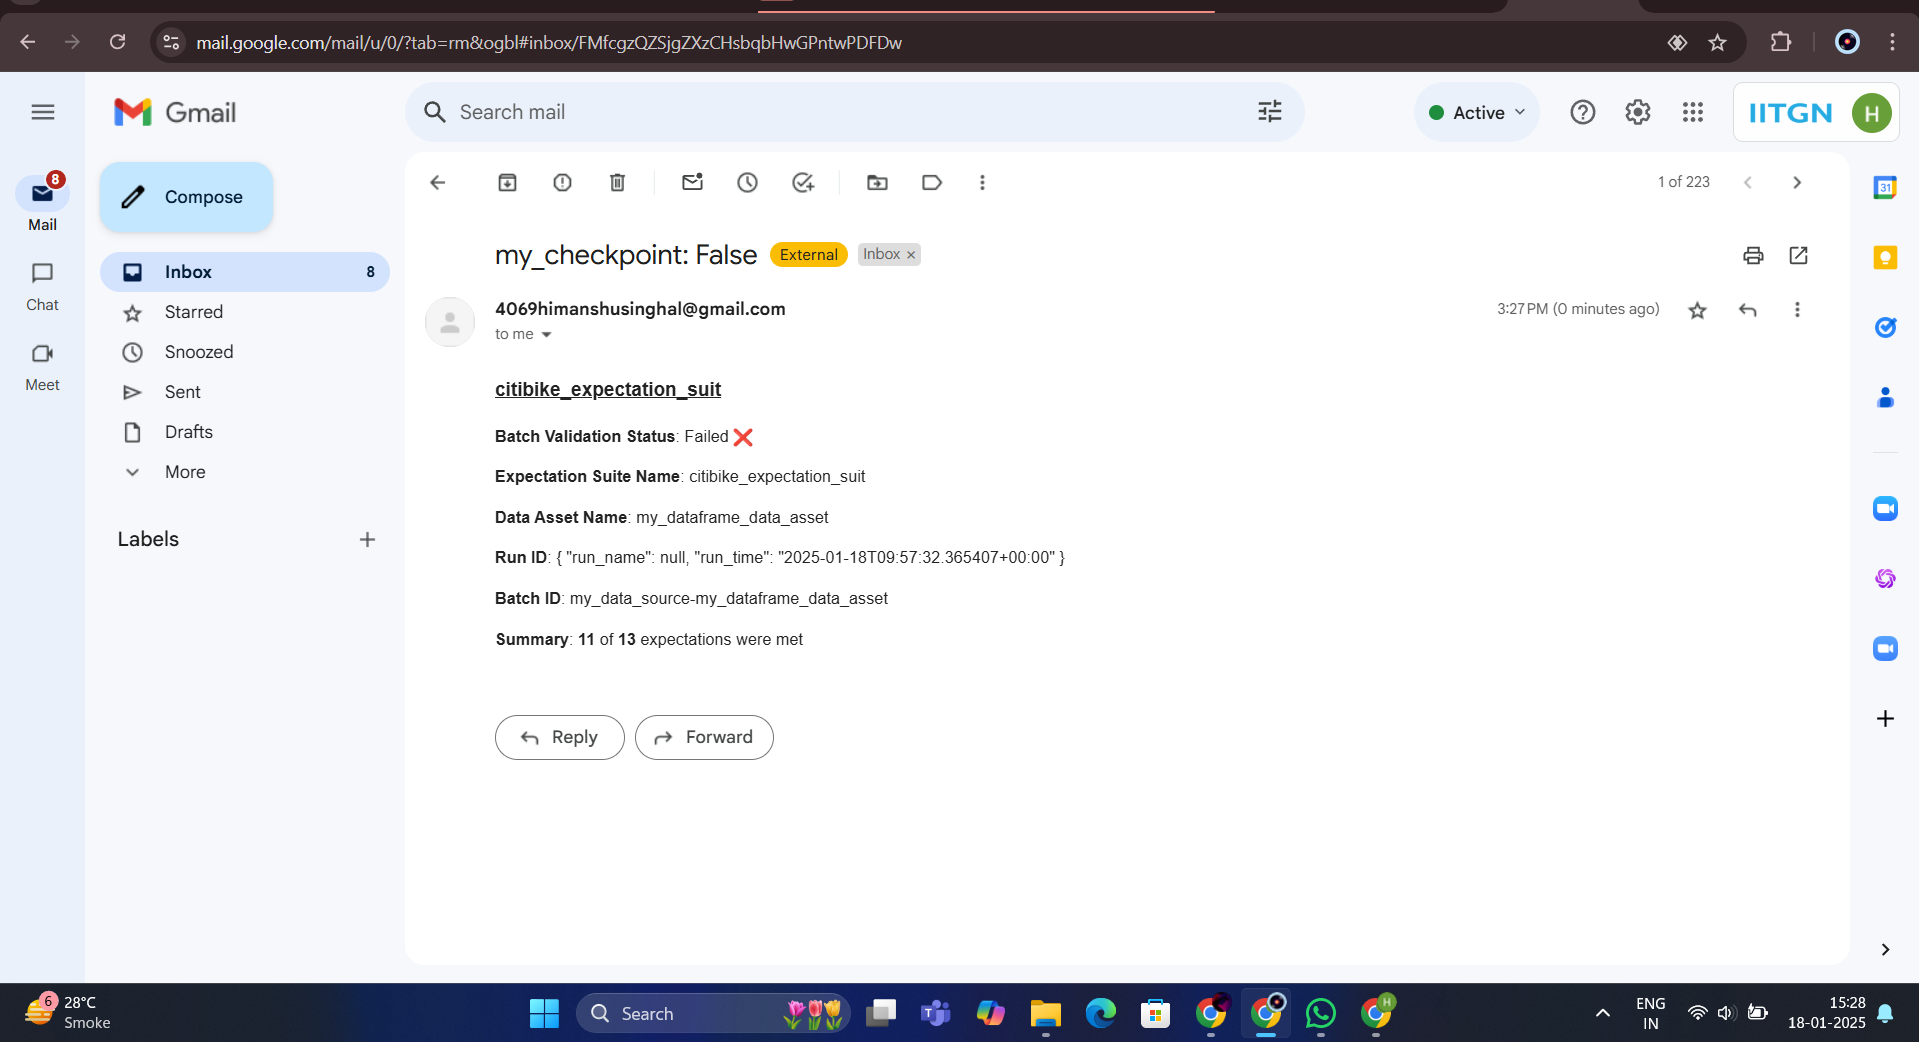